### Plot participation to success logistic for a given batch run


In [3]:
import pandas, numpy as np, dill
from matplotlib import pyplot as plt
import statsmodels.api as sm
%matplotlib inline
batchfiles = ["batch_data/sweep_analysis/NVSuccessPct_1.db", "batch_data/sweep_analysis/NVSuccessPct_10.db", "batch_data/sweep_analysis/NVSuccessPct_50.db"]
measurement = ['Max_InProtestPct', 'Max_ActualInProtestPct', 'Max_NVCitizens'][0]

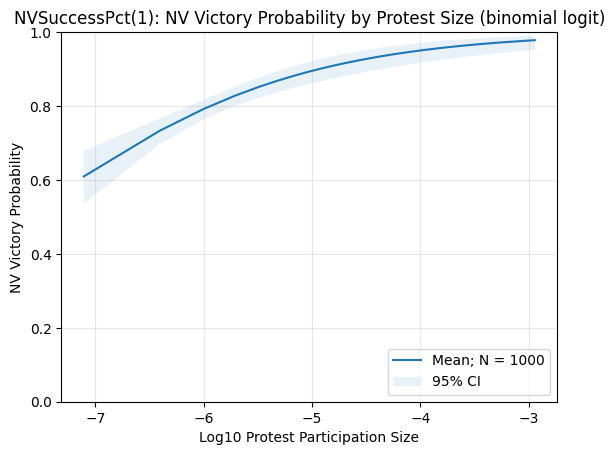

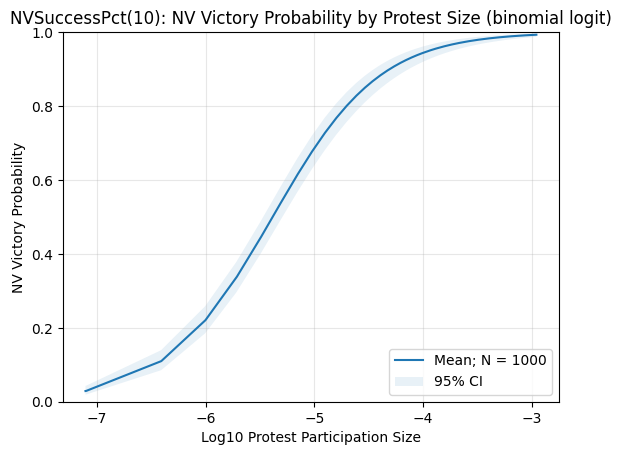

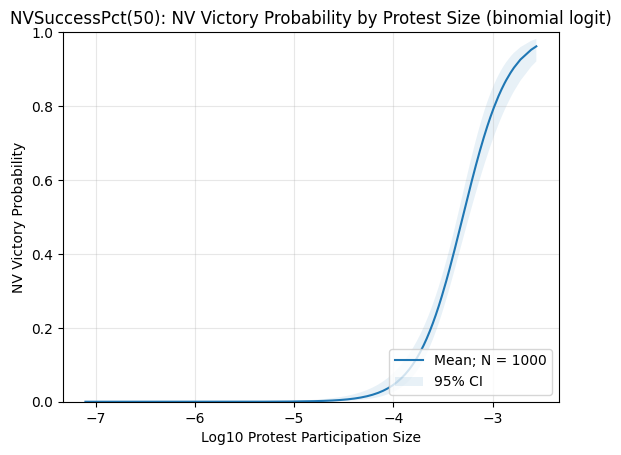

In [10]:
results_groups = []
for path in batchfiles:
    with open(path, 'rb') as file:
        results = dill.load(file)
        results_groups.append(results)

for group_index, run_group in enumerate(results_groups):
    name = batchfiles[group_index].split('/')[-1]
    particip = [ np.log(run[measurement]) for run in run_group]
    success = [ int(run['victory'] == 2) for run in run_group]

    plt.figure()

    #particip = [0,1,2,3,4,5,6,7,8,9]
    #success = [0, 0, 1, 0, 0, 1,1,0,1,1]

    #plt.scatter(particip, success)
    series_pctpop = pandas.Series(particip).sort_values()
    success = [success[i] for i in series_pctpop.index]

    try:
        binom_model = sm.GLM(success,  sm.tools.add_constant(series_pctpop), family=sm.families.Binomial())
        binom_model_results = binom_model.fit()
        predicted = binom_model_results.predict()
    
        pred = binom_model_results.get_prediction()
        df_pred = pred.summary_frame()    
        
        name = name.split(".")[0]
        name, value = name.split("_")
        ax = plt.gca()
        ax.plot(series_pctpop, predicted, label = f'Mean; N = {len(particip)}')
        ax.fill_between(series_pctpop, df_pred.mean_ci_lower, df_pred.mean_ci_upper, alpha=0.1, label = '95% CI')
        ax.legend(loc='lower right')
        ax.set_ylim([0, 1])
        ax.grid(alpha=0.3)
        ax.set_title(f"{name}({value}): NV Victory Probability by Protest Size (binomial logit)")
        ax.set_ylabel("NV Victory Probability")
        ax.set_xlabel("Log10 Protest Participation Size")
    except:
        print(e)


plt.show()